Importo librerías y gráficos:

In [1]:
import numpy as np  #Importo paquete de álgebra lineal
import matplotlib.pyplot as plt  #Importo paquete de gráficos
from scipy.linalg import eigh

Cargo los datos del problema:

In [2]:
E = 210e9  #Módulo de elasticidad en Pa
rho = 7850 #densidad en kg/m^3
long = 1  #Longitud en m
I = 10e-8 #Momento de inercia en m^4
area = 10e-4 #Sección en m^2
vl_r=0 #no sé que es

Grados de libertad por nodo, designación de elementos y modos a calcular:

In [3]:
elementos=[15]#,10,25,100] #Cantidad de elementos que voy a utilizar para comparar
GLXN=2 #Siempre
k=len(elementos)
cantidadmodos=5 #Se puede seleccionar otra cantidad de primeros modos.

Empieza el programa:

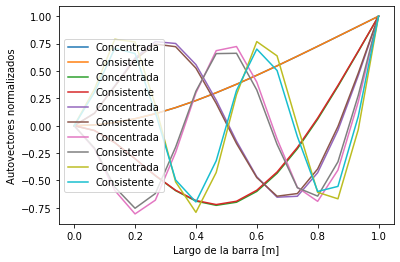

In [4]:
for q in range(k):
    Ne=elementos[q] #número de eleementos
    NN=Ne+1
    
    #Condiciones de vínculo:
    
    s=[0,1] #El primer nodo se encuentra empotrado, es decir, sin desplazamiento vertical ni angular
    r=np.linspace(2,2*NN-1,2*NN-2).astype(int) #Nodos sin condicion de contorno
    
    #Matriz de nodos:
    matriz_nodos=np.linspace(0,long,NN).reshape(-1,1)
    MN=np.hstack([matriz_nodos,np.zeros_like(matriz_nodos)])
    #print(MN)
    
    #Matriz de conectvidad:

    MC=np.zeros((NN,2))
    aux1=-1
    aux2=0

    for i in range(NN):
        aux1+=1
        aux2+=1
        MC[i,0]=aux1
        MC[i,1]=aux2

    Mc=MC.astype(int) 
    
    #Matrices:
    
    Matrizglobal_rigidez=np.zeros((2*NN,2*NN))
    Matrizglobal_concentrada=np.zeros((2*NN,2*NN))
    Matrizglobal_consistente=np.zeros((2*NN,2*NN))
    L=long/Ne
    
    for i in range(Ne):

        #Matriz de rigidez:

        p,j = MC[i]
        Matriz = np.array([[12, 6*L, -12, 6*L],
                           [6*L, 4*L**2, -6*L, 2*L**2],
                           [-12 , -6*L, 12, -6*L],
                           [6*L,2*L**2,-6*L, 4* L**2]])

        coeficiente=(E*I)/(L**3)
        componente = coeficiente*Matriz

        A_G = np.array([p*2,p*2+1]).astype(int)
        B_G = np.array([j*2,j*2+1]).astype(int)
        A_L = np.array([0,1]).astype(int)
        B_L = np.array([2,3]).astype(int)

        Matrizglobal_rigidez[np.ix_(A_G,A_G)] =  componente [np.ix_(A_L,A_L)]+Matrizglobal_rigidez[np.ix_(A_G,A_G)]
        Matrizglobal_rigidez[np.ix_(B_G,B_G)] =  componente [np.ix_(B_L,B_L)]+Matrizglobal_rigidez[np.ix_(B_G,B_G)]
        Matrizglobal_rigidez[np.ix_(A_G,B_G)] =  componente [np.ix_(A_L,B_L)]+Matrizglobal_rigidez[np.ix_(A_G,B_G)]
        Matrizglobal_rigidez[np.ix_(B_G,A_G)] =  componente [np.ix_(B_L,A_L)]+ Matrizglobal_rigidez[np.ix_(B_G,A_G)]


        #Matriz consistente:
        
        Matriz = np.array([[156,22*L, 54*L, -13*L],
                            [22*L,4*L**2, 13*L, -3*L**2],
                            [54,13*L, 156, -22*L],
                            [-13*L,-3*L**2, -22*L, 4*L**2]])

        coeficiente=(rho*area*L)/420
        componente = coeficiente*Matriz

        A_G = np.array([p*2,p*2+1],dtype = int)
        B_G = np.array([j*2,j*2+1],dtype = int) 
        A_L = np.array([0,1],dtype = int)
        B_L = np.array([2,3],dtype = int)

        Matrizglobal_consistente[np.ix_(A_G,A_G)] =  componente [np.ix_(A_L,A_L)]+Matrizglobal_consistente[np.ix_(A_G,A_G)]
        Matrizglobal_consistente[np.ix_(B_G,B_G)] =  componente [np.ix_(B_L,B_L)]+Matrizglobal_consistente[np.ix_(B_G,B_G)]
        Matrizglobal_consistente[np.ix_(A_G,B_G)] =  componente [np.ix_(A_L,B_L)]+Matrizglobal_consistente[np.ix_(A_G,B_G)]
        Matrizglobal_consistente[np.ix_(B_G,A_G)] =  componente [np.ix_(B_L,A_L)]+Matrizglobal_consistente[np.ix_(B_G,A_G)]
        
        #Matriz concentrada:
            
        Matriz = np.array([[12, 0, 0, 0],
                           [0, L**2, 0, 0],
                           [0, 0, 12, 0],
                           [0, 0, 0, L**2]])

        coeficiente=(rho*area*L)/24
        componente = coeficiente*Matriz

        A_G = np.array([p*2,p*2+1],dtype = int)
        B_G = np.array([j*2,j*2+1],dtype = int) 
        A_L = np.array([0,1],dtype = int)
        B_L = np.array([2,3],dtype = int)

        Matrizglobal_concentrada[np.ix_(A_G,A_G)] =  componente [np.ix_(A_L,A_L)]+Matrizglobal_concentrada[np.ix_(A_G,A_G)]
        Matrizglobal_concentrada[np.ix_(B_G,B_G)] =  componente [np.ix_(B_L,B_L)]+Matrizglobal_concentrada[np.ix_(B_G,B_G)] 
        Matrizglobal_concentrada[np.ix_(A_G,B_G)] =  componente [np.ix_(A_L,B_L)]+Matrizglobal_concentrada[np.ix_(A_G,B_G)]    
        Matrizglobal_concentrada[np.ix_(B_G,A_G)] =  componente [np.ix_(B_L,A_L)]+Matrizglobal_concentrada[np.ix_(B_G,A_G)]
    
    #Autovalores y autovectores:
    
    [omega_2_consistente,Vr_consistente]=eigh(Matrizglobal_rigidez[np.ix_(r,r)],Matrizglobal_consistente[np.ix_(r,r)])
    [omega_2_concentrada,Vr_concentrado]=eigh(Matrizglobal_rigidez[np.ix_(r,r)],Matrizglobal_concentrada[np.ix_(r,r)])
    
    #Frecuencias de resonancia (no las utilizo de todos modos):

    frecuencia_consistente=np.sqrt(omega_2_consistente)/(2*np.pi)
    frecuencia_concentrada=np.sqrt(omega_2_concentrada)/(2*np.pi)

    #Autovalores (recordar que el nodo 1 esta empotrado a la pared), de los cuales las filas impares me van a dar
    #el desplazamiento proporcional a la altura y los pares los ángulos:

    Vl_consistente=np.vstack([np.zeros((2,2*(NN-1))),Vr_consistente])
    Vl_concentrado=np.vstack([np.zeros((2,2*(NN-1))),Vr_concentrado])
    
    #Normalizo:

    Vl_normalizado_consistente=Vl_consistente/Vl_consistente[2*NN-2,:]
    Vl_normalizado_concentrado=Vl_concentrado/Vl_concentrado[2*NN-2,:]

    #Hasta acá tengo la frecuencia y los autovectores normalizados y los cargo para poder graficar, considerando los modos normales:
    
    #Me quedo con las componentes impares de los autovectores (desplazamientos):
    
    despconsis=Vl_normalizado_consistente[::2]  
    despconcen=Vl_normalizado_concentrado[::2]

    #Las posiciones se corresponderán con los nodos en x:
    x=np.linspace(0,long,NN)

    for i in range(cantidadmodos):
        
        consistente=despconsis[:,i]
        concentrada=despconcen[:,i]
        plt.plot(x,concentrada, label='Concentrada')
        plt.plot(x,consistente, label='Consistente')

    plt.legend(loc = 'center left')
    plt.xlabel('Largo de la barra [m]')
    plt.ylabel('Autovectores normalizados')

A medida que se aumenta la cantidad de elementos, más convergen a lo mismo las curvas con masas concentrada y consistente a la vez que se suavizan las mismas. 

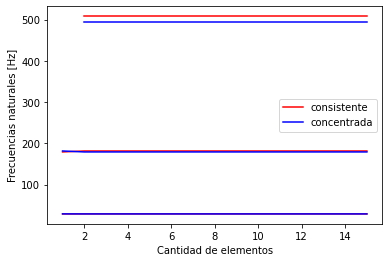

<Figure size 720x432 with 0 Axes>

In [8]:
    #Calculo las frecuencias de los primeros modos normales (sólo 3 y con los elementos del último for para el gráfico anterior):
    
    fconsistente=[]
    fconcentrada=[]
    
    for i in range(Ne):
    
        fconsistente.append(frecuencia_consistente)
        fconcentrada.append(frecuencia_concentrada)
    
    x=np.linspace(1,Ne,Ne).astype(int)
    lenx=len(x)
    
    #Las frecuencias naturales de oscilacion:
    
    f1concen=[]
    f2concen=[]
    f3concen= []

    f1consis=[]
    f2consis=[]
    f3consis=[]

    for i in range(0,Ne):
        if i==0:      #Para 1 elementos no hay f3
            aux1=fconsistente[i]
            aux2=fconcentrada[i]
            f1concen.append(aux1[0])
            f2concen.append(aux1[1])    
            f1consis.append(aux2[0])
            f2consis.append(aux2[1])    
        elif i>=0:
            aux1=fconcentrada[i]
            aux2=fconsistente[i]
            f1concen.append(aux1[0])
            f2concen.append(aux1[1])    
            f3concen.append(aux1[2])
            f1consis.append(aux2[0])
            f2consis.append(aux2[1])    
            f3consis.append(aux2[2]) 

    plt.plot(x,f1consis,'r', label='consistente')
    plt.plot(x,f2consis,'r')
    plt.plot(x[1:lenx],f3consis,'r')
    plt.plot(x,f1concen,'b', label='concentrada')
    plt.plot(x,f2concen,'b')
    plt.plot(x[1:lenx],f3concen,'b')

    plt.legend(loc = 'center right')
    plt.ylabel('Frecuencias naturales [Hz]')
    plt.xlabel('Cantidad de elementos')
    plt.show()

    plt.figure(figsize=(10,6))
    plt.show()

Si bien no quedó reflejado el proceso de convergencia con el aumento de elementos, se puede observar el valor de las frecuencias para cada modo normal y la separación entre los valores de convergencia para ambos cálculos a medida que se pasa a un siguiente modo.